# 台北自行車車禍之分析

作者:李昕融(xinronglee60326@gmail.com)

## 一、研究動機

自幼在台南生長，對於行人、自行車的路權長期被漠視的現象習以為常。然而，今年6月到台北時，發現台北不但有規劃完善的自行車車道、還有寬敞的人行道及騎樓可供民眾安心踏上街頭。筆者對此十分羨慕，希望能透過分析台北市政府對於友善行人及單車的政策、台北市交通事故資料統計來分析政策的成效。

## 二、正文

台北市政府在102年開始推出友善行人及單車生活化的目標，像是自行車路網、以及104年8月31日起實施鄰里交通環境改善計畫，透過交通事故資料的數據分析，藉此觀察政策的施行效果，並期望台南能夠跟進、成為更友善行人的城市。

In [3]:
import itertools
import json
import requests

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab

%matplotlib inline

本次分析需要使用101年到106年的台北交通事故統計資料。

In [4]:
url_6 = 'http://data.taipei/opendata/datalist/datasetMeta/download?id=2f238b4f-1b27-4085-93e9-d684ef0e2735&rid=1948cf36-2df1-4e98-95d7-152d30193d3c'
data_6 = pd.read_csv(url_6, encoding='big5')

url_5 = 'http://data.taipei/opendata/datalist/datasetMeta/download?id=2f238b4f-1b27-4085-93e9-d684ef0e2735&rid=91fbb8c2-4316-44ac-a101-e7b7ff3ba450'
data_5 = pd.read_csv(url_5, encoding='big5')

url_4 = 'C:/Users/user/Downloads/104a1a2.csv'
data_4 = pd.read_csv(url_4, encoding='utf-8')

url_3 = 'http://data.taipei/opendata/datalist/datasetMeta/download?id=2f238b4f-1b27-4085-93e9-d684ef0e2735&rid=5b31590b-1af7-4fed-ac25-6190178acfb5'
data_3 = pd.read_csv(url_3, encoding='big5')

url_2 = 'http://data.taipei/opendata/datalist/datasetMeta/download?id=2f238b4f-1b27-4085-93e9-d684ef0e2735&rid=c7fc1411-a8f0-4258-9f66-e16e58dd2cdd'
data_2 = pd.read_csv(url_2, encoding='big5')

url_1 = 'http://data.taipei/opendata/datalist/datasetMeta/download?id=2f238b4f-1b27-4085-93e9-d684ef0e2735&rid=dbc05cbf-cced-4793-84e8-fda5f67200da'
data_1 = pd.read_csv(url_1, encoding='big5')


### 101年至106年自行車事故件數與交通事故總件數

In [9]:
bike_6 = data_6["車種"] == "F01"
bike_5 = data_5["車種"] == "F01"
bike_4 = data_4["車種"] == "F01"
bike_3 = data_3["車種"] == "F01"
bike_2 = data_2["車種"] == "F01"
bike_1 = data_1["車種"] == "F01"

list_a = [len(data_1[bike_1]),len(data_2[bike_2]),len(data_3[bike_3]),len(data_4[bike_4]),len(data_5[bike_5]),len(data_6[bike_6])]
list_t = [len(data_1),len(data_2),len(data_3),len(data_4),len(data_5),len(data_6)]
ser_a = pd.Series(list_a)
ser_t = pd.Series(list_t)
data = ['101','102','103','104','105','106']
dict_t = {"年份":data,'車禍數量':ser_t}
dict_a = {"年份":data,"自行車車禍案件":ser_a}

df_t = pd.DataFrame(dict_t)
df_a = pd.DataFrame(dict_a)
result = df_t.merge(df_a)

print(result)

    年份   車禍數量  自行車車禍案件
0  101  45950     1073
1  102  47705     1196
2  103  49135     1283
3  104  49519     1217
4  105  51692     1277
5  106  50951     1189


### 自行車事故件數與總車禍件數之變化

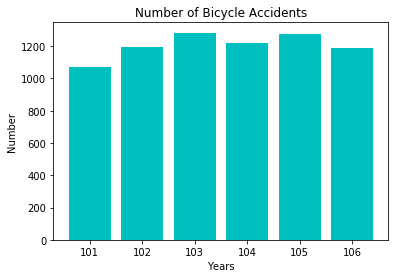

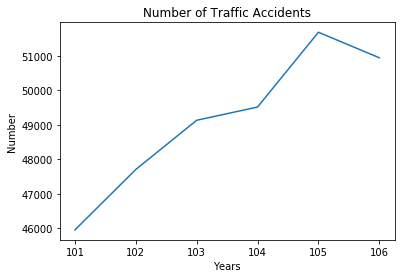

In [15]:
y1 = ser_a
y2 = ser_t
x1 = ['101','102','103','104','105','106']
plt.xlabel("Years")
plt.ylabel("Number")
plt.title('Number of Bicycle Accidents')

plt.bar(x1,y1,color = "c")
plt.show()

plt.xlabel("Years")
plt.ylabel("Number")
plt.title('Number of Traffic Accidents')
plt.plot(x1,y2)
plt.show()

由柱狀圖可以看出自行車的車禍案件數並沒有太大的波動；然而車禍總案件數卻幾乎是每年攀升。
因此若單純以每年自行車的車禍數來看，有失準確。

### 相關係數圖:自行車車禍件數與總車禍件數

Text(0.5,1,'Correlation to Traffic Accident and Bike Accident')

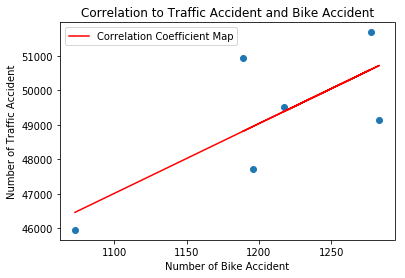

In [33]:
xs = list_a
ys = list_t
# np.corrcoef(list_a,list_t)
plt.scatter(list_a,list_t)

def slope(x_val,y_val):
    x = np.array(x_val)
    y = np.array(y_val)
    m = (((np.mean(x)*np.mean(y))-np.mean(x*y))/((np.mean(x)*np.mean(x))-np.mean(x*x)))
    m = round(m,2)
    b = (np.mean(y)-np.mean(x)*m)
    b = round(b,2)
    return m,b
m,b = slope(xs,ys)

reg_line = [(m*x)+b for x in xs]
plt.xlabel('Number of Bike Accident')
plt.ylabel('Number of Traffic Accident')

plt.plot(xs,reg_line,color = "r",label='Correlation Coefficient Map')
plt.legend(loc='best')
plt.title("Correlation to Traffic Accident and Bike Accident")
# plt.show()

筆者採用相關係數突來分析單車案件數與總車禍案件數之關係。

###  行人交通事故之分析

台北市政府於103年開始規劃鄰里交通計畫，目的是提供行人更易於步行的環境。

Text(0.5,1,'Correlation to Traffic Accident and Pedestrian')

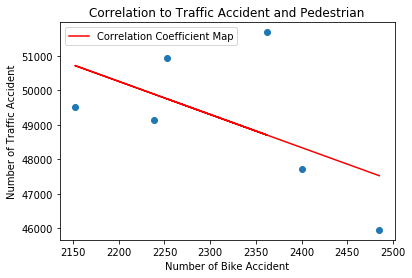

In [24]:
ped_6 = data_6["車種"] == "H01"
ped_5 = data_5["車種"] == "H01"
ped_4 = data_4["車種"] == "H01"
ped_3 = data_3["車種"] == "H01"
ped_2 = data_2["車種"] == "H01"
ped_1 = data_1["車種"] == "H01"

list_ped = [len(data_1[ped_1]),len(data_2[ped_2]),len(data_3[ped_3]),len(data_4[ped_4]),len(data_5[ped_5]),len(data_6[ped_6])]
ser_ped = pd.Series(list_ped)
dict_ped = {"年份":data,"自行車車禍案件":ser_ped}
df_ped = pd.DataFrame(list_ped)

x2 = ser_ped
y2 = ser_t
plt.scatter(ser_ped,ser_t)

def slope(x_val,y_val):
    x = np.array(x_val)
    y = np.array(y_val)
    m = (((np.mean(x)*np.mean(y))-np.mean(x*y))/((np.mean(x)*np.mean(x))-np.mean(x*x)))
    m = round(m,2)
    b = (np.mean(y)-np.mean(x)*m)
    b = round(b,2)
    return m,b
m,b = slope(x2,y2)

reg_line = [(m*x)+b for x in x2]
plt.xlabel('Number of Bike Accident')
plt.ylabel('Number of Traffic Accident')

plt.plot(x2,reg_line,color = "r",label='Correlation Coefficient Map')
plt.legend(loc='best')
plt.title("Correlation to Traffic Accident and Pedestrian")

### 政策對Youbike租借率之影響 

除了建造友善自行車的環境，台北市政府也一直致力於提升微笑單車Youbike的使用率。不過在104年4月1日實行使用者付費原則--
借用Youbike前三十分鐘，由免費改為須付款5元。希望透過分析Youbike租借次數，來觀察政策對民眾租借Youbike的影響性。 

In [18]:
url = 'C:/Users/user/Desktop/ubike_num.csv'
num = pd.read_csv(url, encoding = 'big5')
num.dropna()
n = num.iloc[0:9,1]
m = num.iloc[0:9,0]
total = num.iloc[:]

series_n =  pd.Series(n)
series_m = pd.Series(m)

print(total)


        月份    租借次數(車次)
0   103年3月     1767106
1   103年4月     1938518
2   104年3月     2065266
3   104年4月     1662426
4   105年3月     1242340
5   105年4月     1582565
6   106年3月     1719024
7   106年4月     1900724
8   107年3月     2191938
9   107年4月     2221447


上表是從103年到107年，每年3、4月的台北市Youbike租借次數。之所以選擇3、4兩月的原因有兩個:


1.使用者付費原則是從104年4月1日開始實施，由此可以明顯看出政策的影響


2.增加樣本數，數據更容易分析。

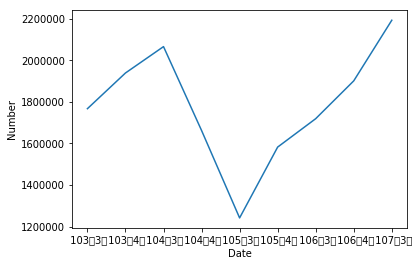

In [19]:
y1 = series_n
x1 = series_m
plt.xlabel("Date")
plt.ylabel("Number")

plt.plot(x1,y1)
plt.show()


由折線圖可看出使用者付費此政策對民眾租借公共單車的影響。不過隨著自行車路網趨漸完備，及社會風氣之影響，民眾的使用意願仍隨著時間逐步升高。


## 結語

透過台北市交通事故資料的分析，可以看出民眾租借公共單車的意願提升，並且自行車、行人的事故比例也相對減少。目前台南缺乏安全的環境供自行車騎乘，以至於單車騎士常需在大馬路上
與汽機車爭道，十分危險。而蜿蜒小巷內，也常停滿附近居民的交通工具，導致路人行走不易，也更容易發生事故。若要減少交通意外發生，建議可以仿效首都，重新重視單車及行人的路權，規劃完善的
交通環境。